# Part 1: Analyze and Explore the Climate Data

Use Python and SQLAlchemy to do a basic climate analysis and data exploration of the climate database.

In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
recent_date = session.query(measurement.date).order_by(measurement.date.desc()).first()
recent_date

('2017-08-23',)

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results.
# Starting from the most recent data point in the database. 
            # Steps to do this are in the next set of boxes

In [11]:
# Calculate the date one year from the last date in data set.
latest_date = dt.datetime.strptime(recent_date[0], '%Y-%m-%d')
one_year_prior = dt.date(latest_date.year -1, latest_date.month, latest_date.day)
one_year_prior

datetime.date(2016, 8, 23)

In [12]:
# Perform a query to retrieve the data and precipitation scores
sel = [measurement.date, measurement.prcp]
date_prcp = session.query(*sel).filter(measurement.date >= one_year_prior).all()
date_prcp

[('2016-08-23', 0.0),
 ('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06'

In [13]:
# Save the query results as a Pandas DataFrame and set the index to the date column
prcp = pd.DataFrame(date_prcp, columns=['Date', 'Precipitation'])

In [14]:
# Sort the dataframe by date
prcp = prcp.sort_values(["Date"], ascending=True)
prcp

,Date,Precipitation
0,2016-08-23,0.00
1009,2016-08-23,NaN
1529,2016-08-23,1.79
704,2016-08-23,0.05
361,2016-08-23,0.15
...,...,...
1527,2017-08-22,0.00
1008,2017-08-23,0.00
360,2017-08-23,0.00
1528,2017-08-23,0.08


In [15]:
# Remove NaN values and set index
prcp = prcp.dropna(how='any')
prcp.set_index("Date", inplace=True)
prcp.head()

,Precipitation
Date,
2016-08-23,0.00
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15
2016-08-23,0.70


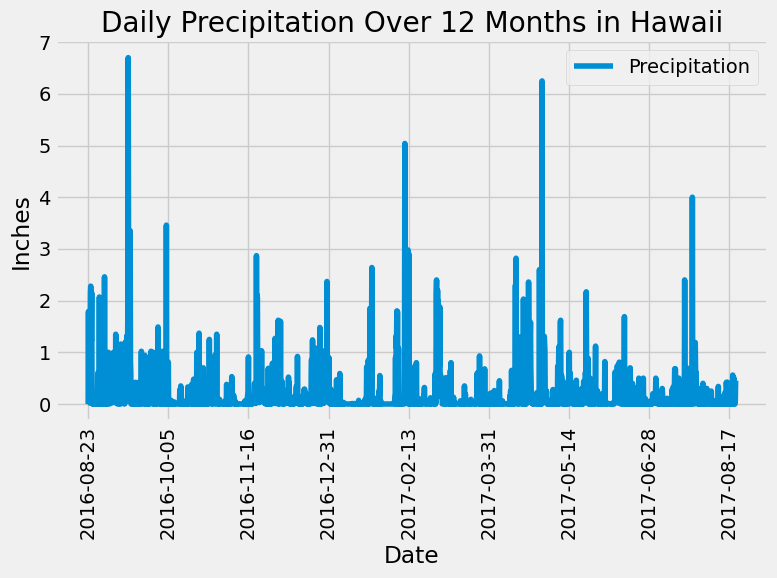

In [16]:
# Use Pandas Plotting with Matplotlib to plot the data
prcp_plot = prcp.plot(figsize=(8,6), title = "Daily Precipitation Over 12 Months in Hawaii", rot=90)
prcp_plot.set_ylabel("Inches")
prcp_plot.set_xlabel("Date")
plt.legend(loc='upper right')
plt.tight_layout()
plt.savefig('daily_precipitation_plot.png')
plt.show()

In [17]:
# Use Pandas to calcualte the summary statistics for the precipitation data
sum_stats = prcp["Precipitation"].to_frame()
sum_stats.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [18]:
# Design a query to calculate the total number stations in the dataset
stations = session.query(station.station).count()
stations

9

In [19]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
sel = [measurement.station, func.count(measurement.id)]
active = session.query(*sel).group_by(measurement.station).order_by(func.count(measurement.id).desc()).all()
active

# Staion 'USC00519281' is the most active station

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [20]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
sel = [measurement.station, func.min(measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs)]
temp_query = session.query(*sel).group_by(measurement.station).order_by(func.count(measurement.id).desc()).first()
temp_query

#USC00519281 is the most active station id
#The lowest temp was 54.0 degrees.
#The highest temp was 85 degrees.
#The average temp was 71.66378066378067 degrees.

('USC00519281', 54.0, 85.0, 71.66378066378067)

In [21]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station
sel = [measurement.date, measurement.tobs]
temps = session.query(*sel).filter(func.strftime(measurement.date) >= one_year_prior, measurement.station == 'USC00519281').\
    group_by(measurement.date).order_by(measurement.date).all()
temps

[('2016-08-23', 77.0),
 ('2016-08-24', 77.0),
 ('2016-08-25', 80.0),
 ('2016-08-26', 80.0),
 ('2016-08-27', 75.0),
 ('2016-08-28', 73.0),
 ('2016-08-29', 78.0),
 ('2016-08-30', 77.0),
 ('2016-08-31', 78.0),
 ('2016-09-01', 80.0),
 ('2016-09-02', 80.0),
 ('2016-09-03', 78.0),
 ('2016-09-04', 78.0),
 ('2016-09-05', 78.0),
 ('2016-09-06', 73.0),
 ('2016-09-07', 74.0),
 ('2016-09-08', 80.0),
 ('2016-09-09', 79.0),
 ('2016-09-10', 77.0),
 ('2016-09-11', 80.0),
 ('2016-09-12', 76.0),
 ('2016-09-13', 79.0),
 ('2016-09-14', 75.0),
 ('2016-09-15', 79.0),
 ('2016-09-16', 78.0),
 ('2016-09-17', 79.0),
 ('2016-09-18', 78.0),
 ('2016-09-19', 78.0),
 ('2016-09-20', 76.0),
 ('2016-09-21', 74.0),
 ('2016-09-22', 77.0),
 ('2016-09-23', 78.0),
 ('2016-09-24', 79.0),
 ('2016-09-25', 79.0),
 ('2016-09-26', 77.0),
 ('2016-09-27', 80.0),
 ('2016-09-28', 78.0),
 ('2016-09-29', 78.0),
 ('2016-09-30', 78.0),
 ('2016-10-01', 77.0),
 ('2016-10-02', 79.0),
 ('2016-10-03', 79.0),
 ('2016-10-04', 79.0),
 ('2016-10-

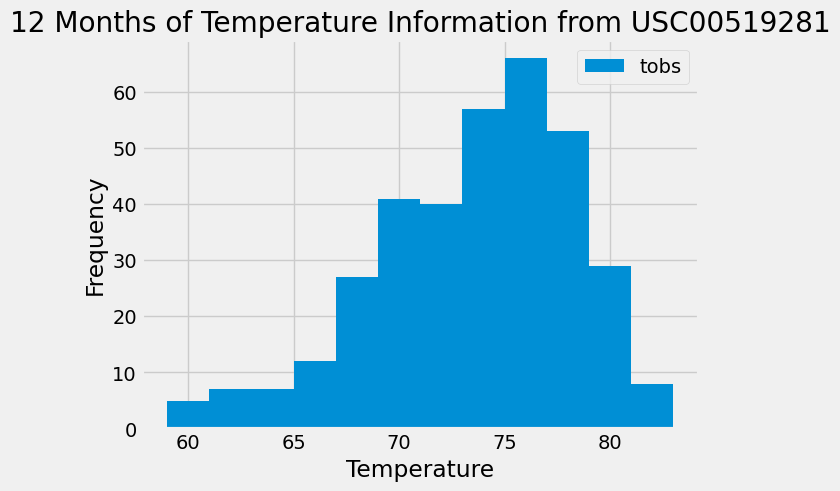

In [22]:
# Plot the results as a histogram --> From assignment outline: Plot the results as a histogram with bins=12

# Make temps query just completed into a dataframe to easily graph the results
temp_df = pd.DataFrame(temps, columns=["Station ID", "Temperature"])

# Plot results as a histogram
plt.hist(temp_df['Temperature'], bins=12, label="tobs")
plt.title("12 Months of Temperature Information from USC00519281")
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.legend(loc='upper right')
plt.savefig('12_mos_USC00519281.png')
plt.show()

# Close session

In [23]:
# Close Session
session.close()